In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [2]:
seed1 = 1982537
seed2 = 1258965
random_numbers = []

In [3]:
for i in range(10000):
    ran1=(16807*seed1)%((2**31)-1)
    ran2=(16807*seed2)%((2**31)-1)
    random_numbers.append({'ran1':ran1,'ran2':ran2})
    seed1 = ran1
    seed2 = ran2

In [4]:
df = pd.DataFrame(random_numbers)

In [5]:
df['ran1_norm'] = (df['ran1']-min(df['ran1']))/(max(df['ran1'])-min(df['ran1']))
df['ran2_norm'] = (df['ran2']-min(df['ran2']))/(max(df['ran2'])-min(df['ran2']))

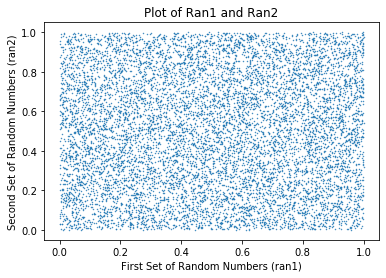

In [6]:
plt.scatter(df['ran1_norm'],df['ran2_norm'],s=0.2)
plt.xlabel('First Set of Random Numbers (ran1)')
plt.ylabel('Second Set of Random Numbers (ran2)')
plt.title('Plot of Ran1 and Ran2')
plt.show()

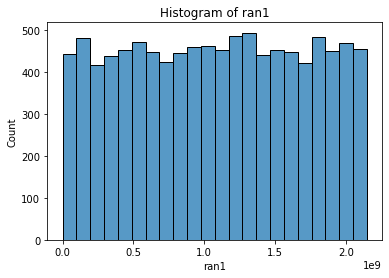

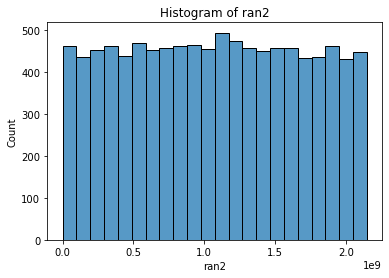

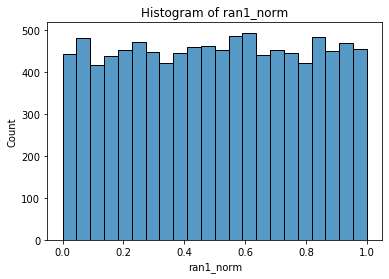

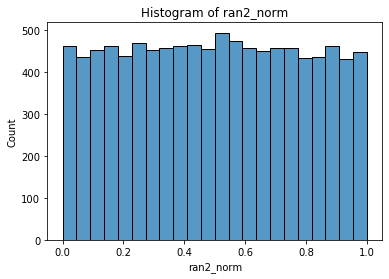

In [7]:
for column in df.columns:
    sns.histplot(df[column])
    plt.title(f'Histogram of {column}')
    plt.show()

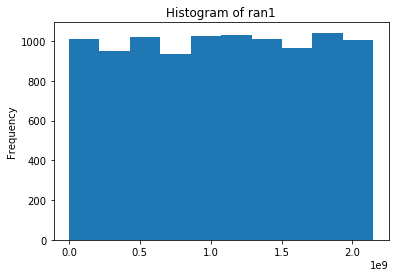

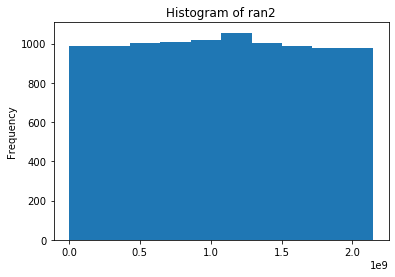

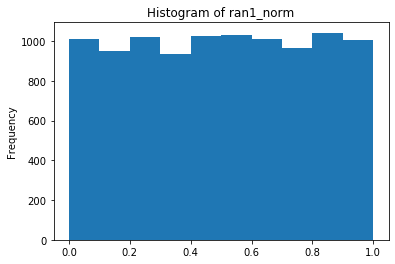

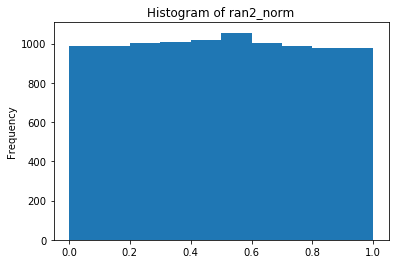

In [8]:
for column in df.columns:
    df[column].plot(kind='hist')
    plt.title(f'Histogram of {column}')
    plt.show()

## Using `random` module

In [9]:
import random

In [10]:
random_numbers = []
for i in range(10000):
    random_numbers.append({'ran1':random.random(),'ran2':random.random()})
df_m=pd.DataFrame(random_numbers)

In [11]:
df_m.head()

,ran1,ran2
0,0.725147,0.283054
1,0.661438,0.094307
2,0.145963,0.229446
3,0.289665,0.142339
4,0.266994,0.654094


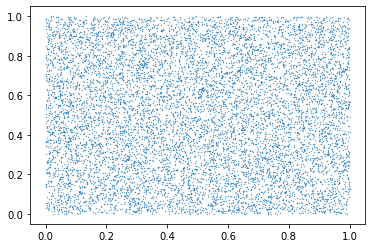

In [12]:
plt.scatter(df_m['ran1'],df_m['ran2'],s=0.1)

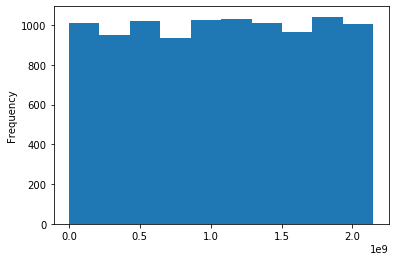

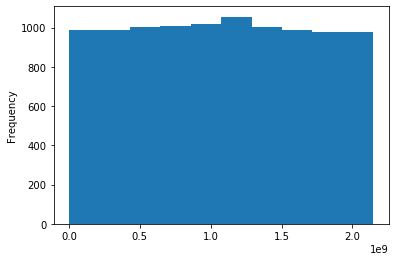

In [13]:
for column in df_m.columns:
    df[column].plot(kind='hist')
    plt.show()

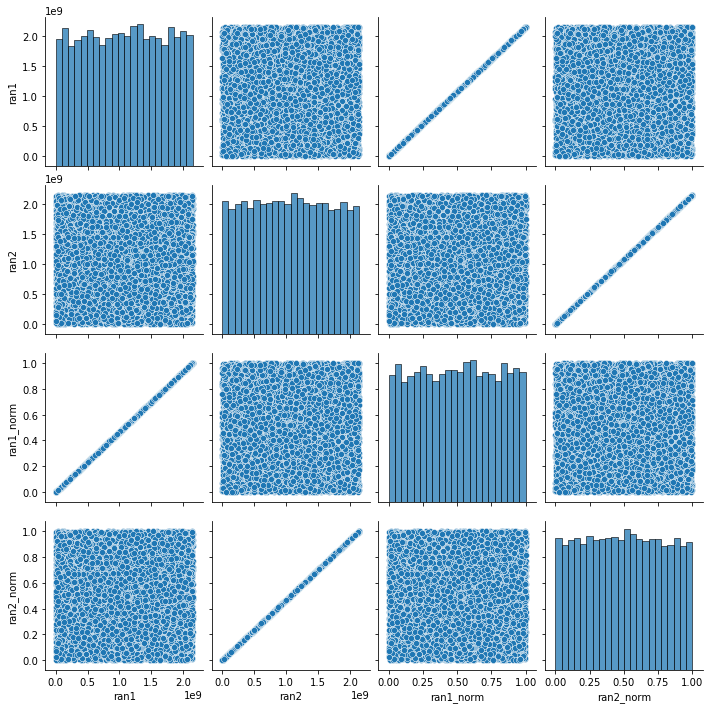

In [14]:
sns.pairplot(df)

In [22]:
# import numpy as np
# import math
# df['ran1_gau'] = ((-2*np.log(df['ran1_norm']))**(1/2))*(math.cos(np.asarray(2*math.pi))*df['ran2_norm'])
# df['ran2_gau'] = ((-2*np.log(df['ran1_norm']))**(1/2))*(math.sin(np.asarray(2*math.pi))*df['ran2_norm'])
# df.replace([np.inf, -np.inf], 0, inplace=True)
z1_list=[]
z2_list=[]
for idx, row in df.iterrows():
    if row['ran1_norm']==0:
        z1_list.append(0)
        z2_list.append(0)
    else:
        z1=((-2*np.log(row['ran1_norm']))**(1/2))*(math.cos((2*math.pi)*row['ran2_norm']))
        z2=((-2*np.log(row['ran1_norm']))**(1/2))*(math.cos((2*math.pi)*row['ran2_norm']))
        z1_list.append(z1)
        z2_list.append(z2)
df['ran1_gau'] = z1_list
df['ran2_gau'] = z2_list

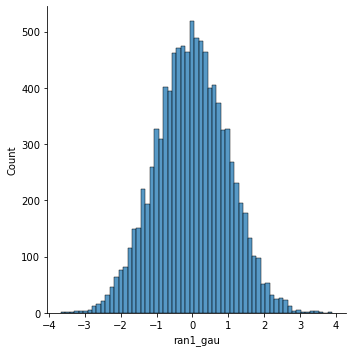

In [23]:
sns.displot(df['ran1_gau'])

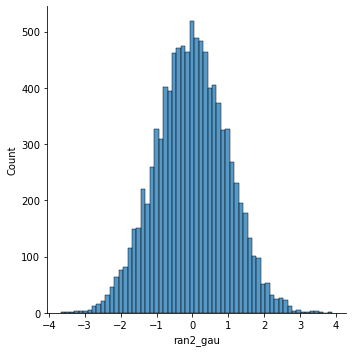

In [24]:
sns.displot(df['ran2_gau'])

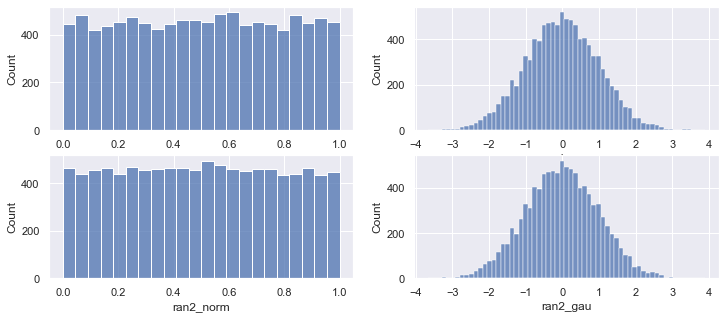

In [32]:
sns.set()
fig, axes = plt.subplots(2, 2,figsize=(12,5))
sns.histplot(data=df, x='ran1_norm', ax=axes[0,0])
sns.histplot(data=df, x='ran1_gau', ax=axes[0,1])
sns.histplot(data=df, x='ran2_norm', ax=axes[1,0])
sns.histplot(data=df, x='ran2_gau', ax=axes[1,1])

In [35]:
for column in df.columns:
    mean = df[column].mean()
    std = df[column].std()
    print(f'Mean of {column} is {mean} and Standard Deviation is {std}')

Mean of ran1 is 1078724990.9067 and Standard Deviation is 619351062.9969354
Mean of ran2 is 1069922589.627 and Standard Deviation is 615525408.8717414
Mean of ran1_norm is 0.5023371484126384 and Standard Deviation is 0.2884618730019362
Mean of ran2_norm is 0.4982823211384868 and Standard Deviation is 0.28668790098651387
Mean of ran1_gau is -0.0182302984739899 and Standard Deviation is 0.9956062861970245
Mean of ran2_gau is -0.0182302984739899 and Standard Deviation is 0.9956062861970245


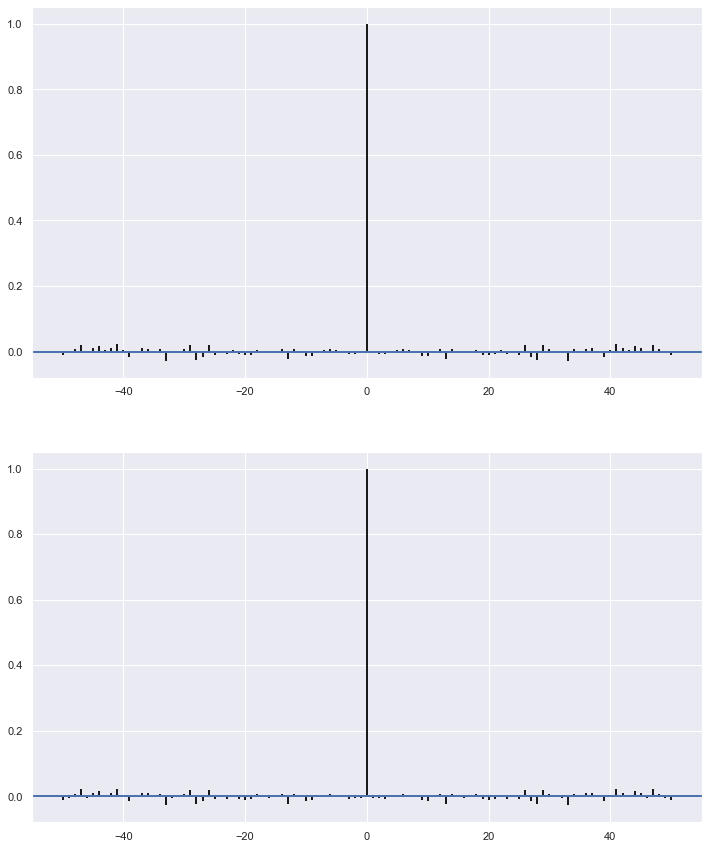

In [52]:
fig, [ax1, ax2] = plt.subplots(2, 1,figsize=(12,15))
ax1.xcorr(df['ran1_gau'], df['ran2_gau'], usevlines=True, maxlags=50, normed=True, lw=2)
ax1.grid(True)

ax2.acorr(df['ran1_gau'], usevlines=True, normed=True, maxlags=50, lw=2)
ax2.grid(True)

plt.show()